[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/k-beauty-oversea-online-sale-output.ipynb)

## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 시각화를 위한 폰트 설정
import os
# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [4]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20210514102731.csv", 
                     encoding="cp949")
df_raw.head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4,2021 1/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,...,974060,1251122,1345723,1526135,1881628,1529955,1284863,1650010,1517553,1178153
1,합계,합계,면세점,-,-,-,-,-,-,-,...,770656,1070693,1157158,1336372,1655635,1297490,1051987,1410967,1247495,972384
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,...,203404,180429,188565,189763,225993,232465,232876,239043,270058,205769
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,...,4511,3702,4038,3670,3827,4142,3814,7716,3583,4231
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,215,2,0,1,70,113,0,3497,0,0


In [5]:
df_raw.shape

(450, 32)

In [6]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw['국가(대륙)별'].value_counts()

합계            45
유럽연합(EU)      45
아세안(ASEAN)    45
중동            45
기타            45
중남미           45
일본            45
미국            45
대양주           45
중국            45
Name: 국가(대륙)별, dtype: int64

In [7]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,...,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4,2020 3/4,2020 4/4,2021 1/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,48978,40985,44973,55512,54054,49155,66057,67693,72531,60887
46,미국,합계,면세점,-,-,-,-,-,-,-,...,2079,2657,2951,1818,1481,698,339,81,67,56
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,46899,38328,42022,53694,52573,48457,65718,67612,72464,60831
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,1774,1298,1408,1653,1383,1182,1631,1866,1368,1636
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,1,0,0,0,0,0,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [8]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4', '2020 1/4', '2020 2/4', '2020 3/4',
       '2020 4/4', '2021 1/4 p)'],
      dtype='object')

In [9]:
df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"])  

,국가(대륙)별,상품군별,판매유형별,variable,value
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
13045,기타,생활용품 및 자동차용품,면세점,2021 1/4 p),0
13046,기타,생활용품 및 자동차용품,면세점 이외,2021 1/4 p),338
13047,기타,기 타,계,2021 1/4 p),823
13048,기타,기 타,면세점,2021 1/4 p),0


: df.melt() : value_vars를 지정하지 않으면, id_vars에 제외한 나머지 행들을 melt해서 만든다

In [10]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], 
                 var_name="기간", value_name="백만원")
df.shape

(13050, 5)

In [11]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13050 entries, 0 to 13049
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  13050 non-null  object
 1   상품군별     13050 non-null  object
 2   판매유형별    13050 non-null  object
 3   기간       13050 non-null  object
 4   백만원      13050 non-null  object
dtypes: object(5)
memory usage: 509.9+ KB


## 데이터 전처리
### 기간에서 연도를 분리하기

In [13]:
"2021 1/4 p)".split()

['2021', '1/4', 'p)']

In [14]:
int("2021 1/4 p)".split()[0])

2021

In [79]:
# 기간에서 연도만 분리하기
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1


In [88]:
# 기간에서 분기만 분리하기
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1


In [84]:
"2014 1/4".split()[1]

'1/4'

### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [17]:
df['백만원'] = df['백만원'].replace("-", np.NAN).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


### 필요없는 데이터 제거하기

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13050 entries, 0 to 13049
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  13050 non-null  object 
 1   상품군별     13050 non-null  object 
 2   판매유형별    13050 non-null  object 
 3   기간       13050 non-null  object 
 4   백만원      9450 non-null   float64
 5   연도       13050 non-null  int64  
 6   분기       13050 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 713.8+ KB


In [20]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10962 entries, 48 to 13049
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10962 non-null  object 
 1   상품군별     10962 non-null  object 
 2   판매유형별    10962 non-null  object 
 3   기간       10962 non-null  object 
 4   백만원      7938 non-null   float64
 5   연도       10962 non-null  int64  
 6   분기       10962 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 685.1+ KB


In [22]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

In [23]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "계" 데이터만 가져와서 봐야지 평균 값을 구하는 그래프에서 올바른 값표현이 가능
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='백만원'>

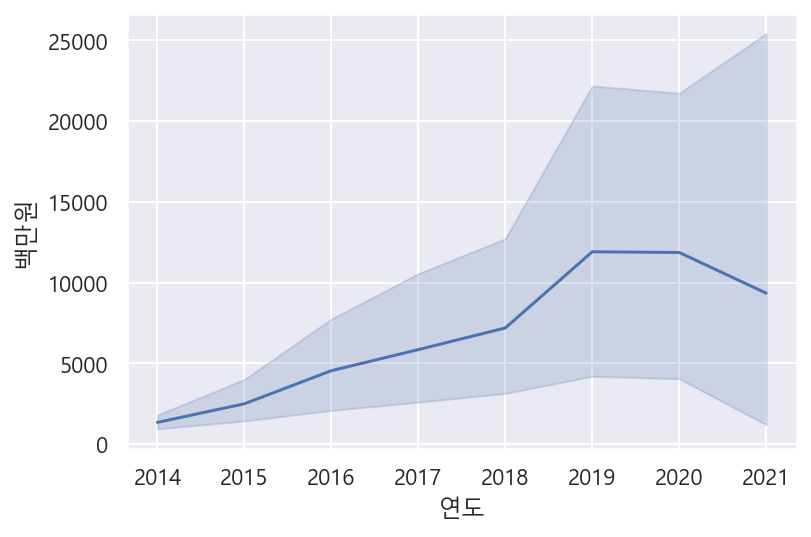

In [24]:
# 연도, 판매액 lineplot으로 그리기
sns.lineplot(data=df_total, x="연도", y="백만원")

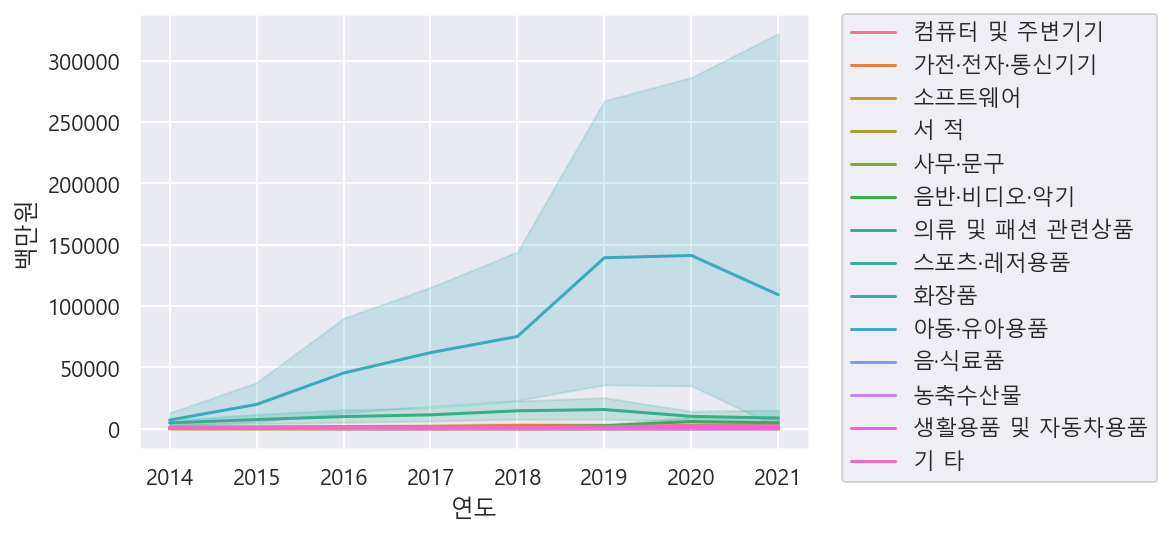

In [27]:
# 상품군별로 다른 색상 펴시하기
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # legend를 그래프 밖에 표시

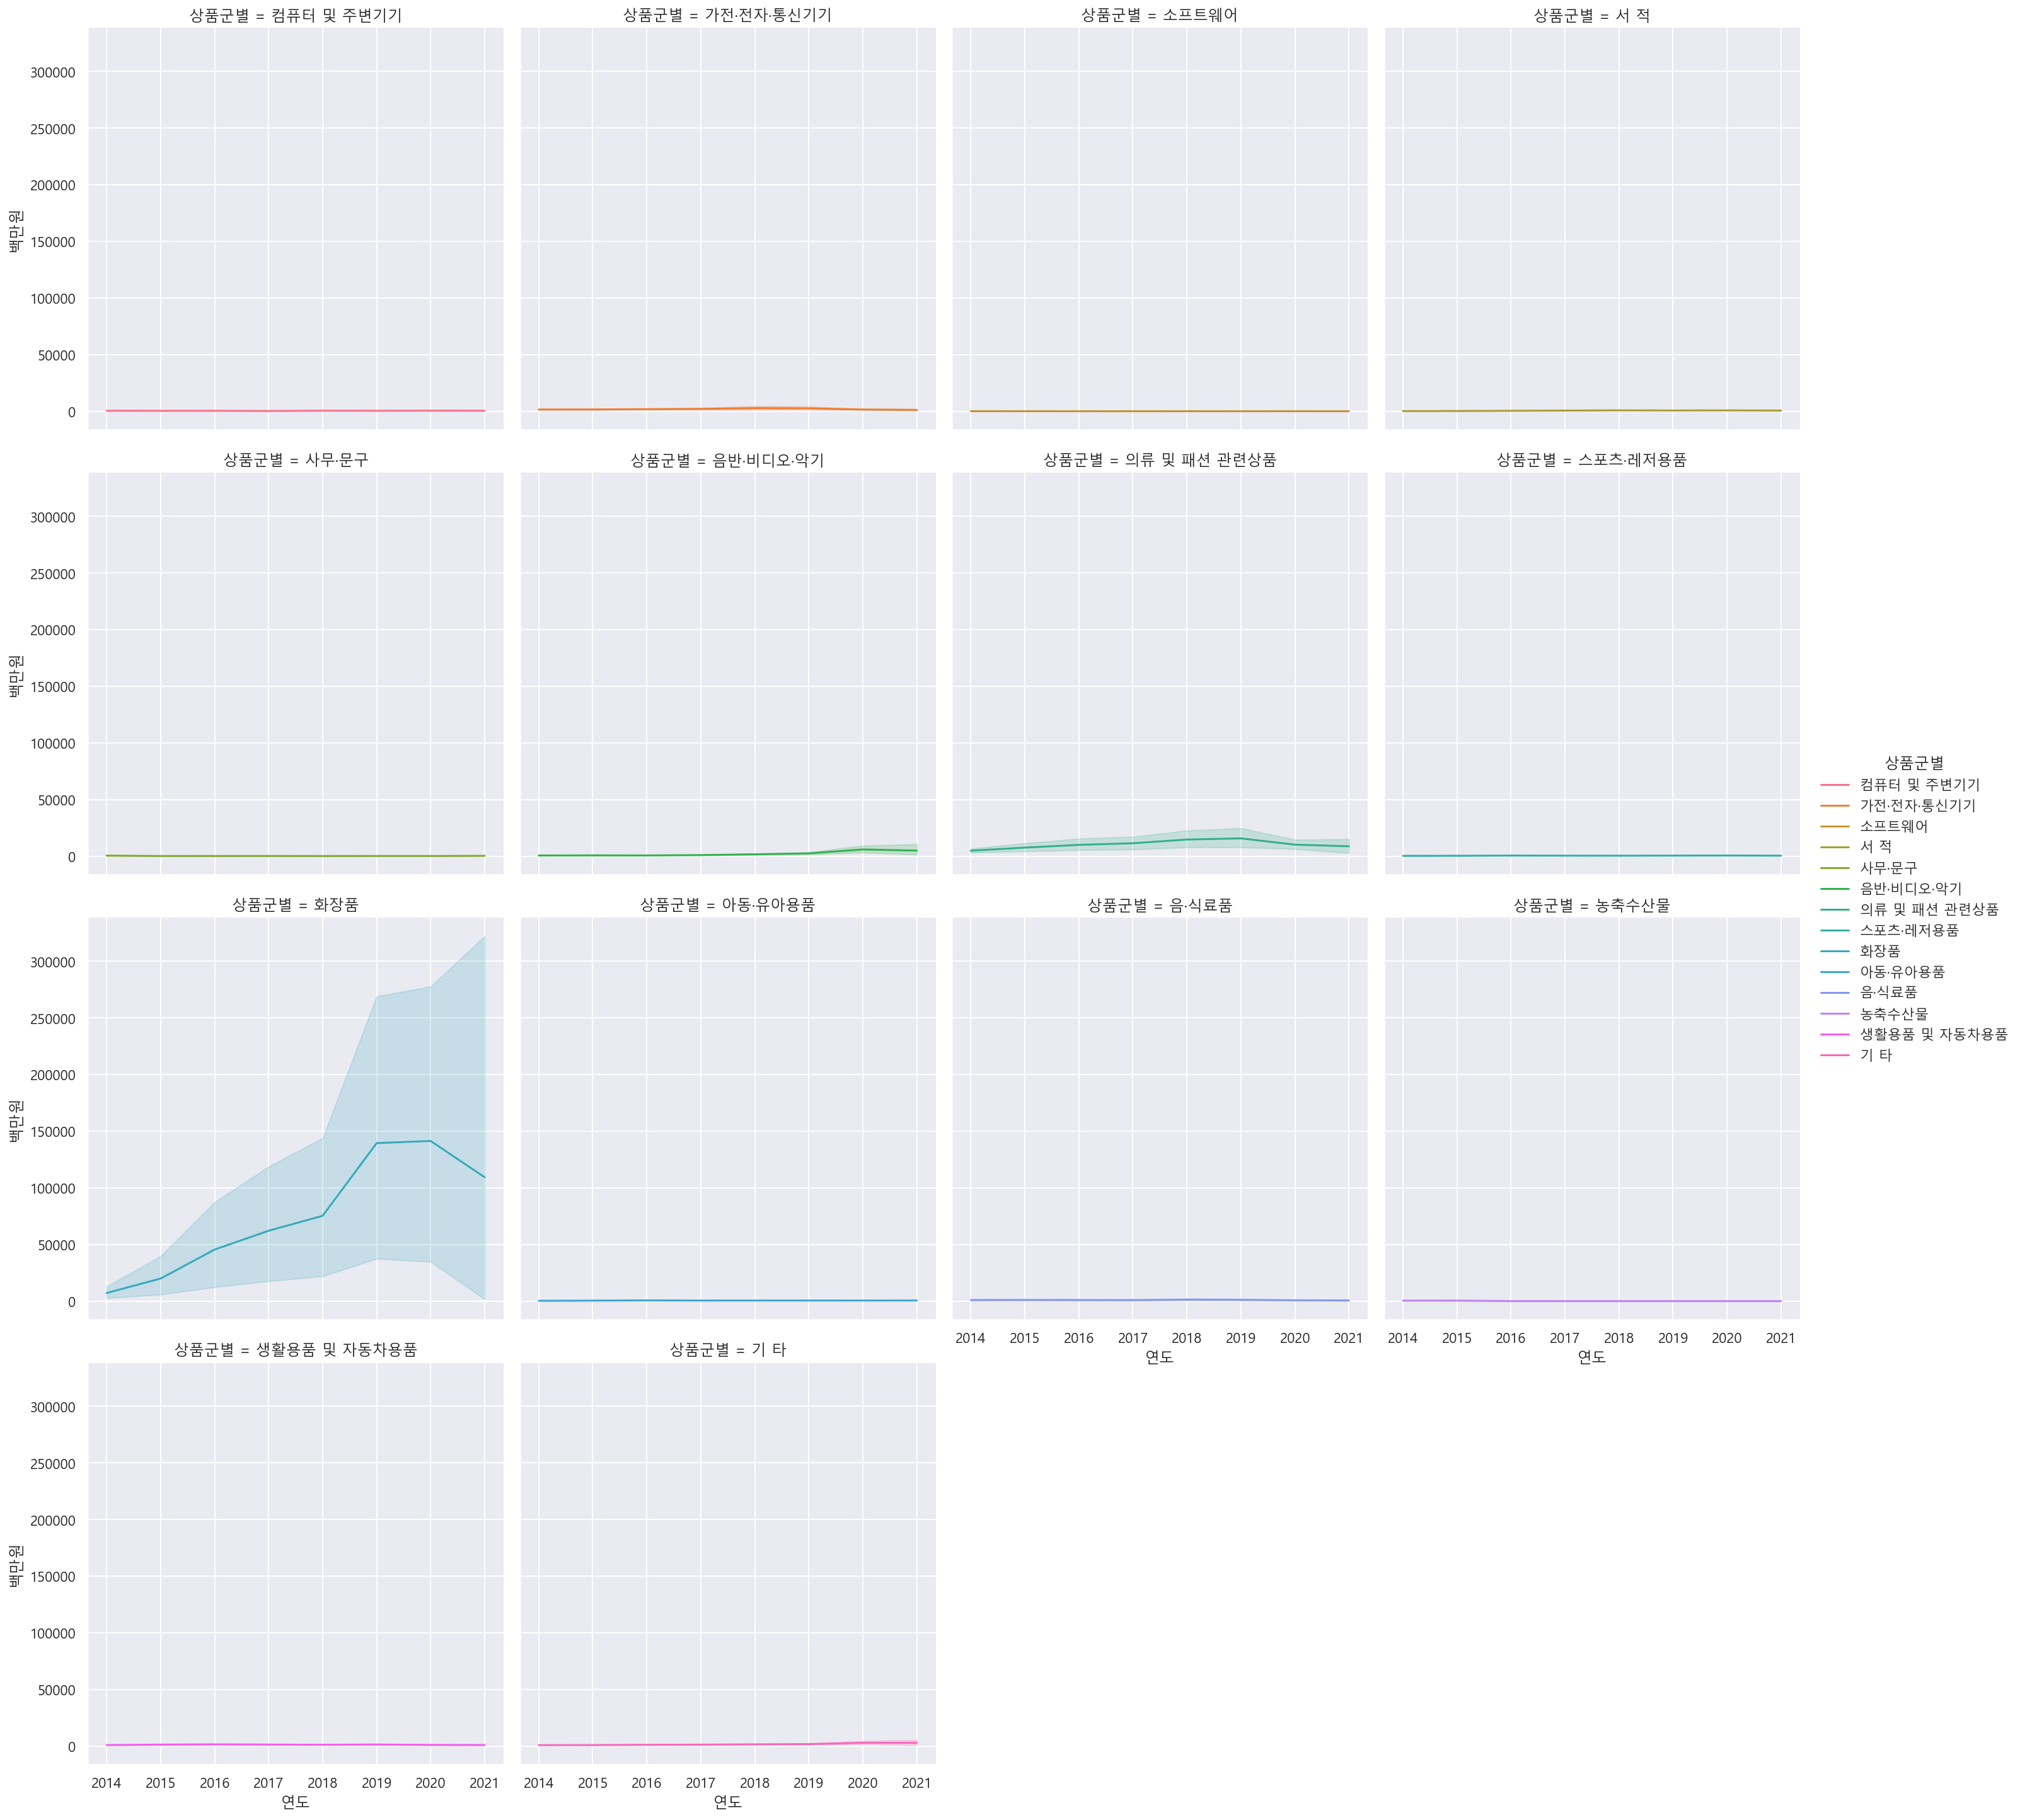

In [30]:
# 자세히 보기위해 subplot으로 표시
sns.relplot(data=df_total, x="연도", y="백만원", 
            hue="상품군별", kind="line", col="상품군별", col_wrap=4)

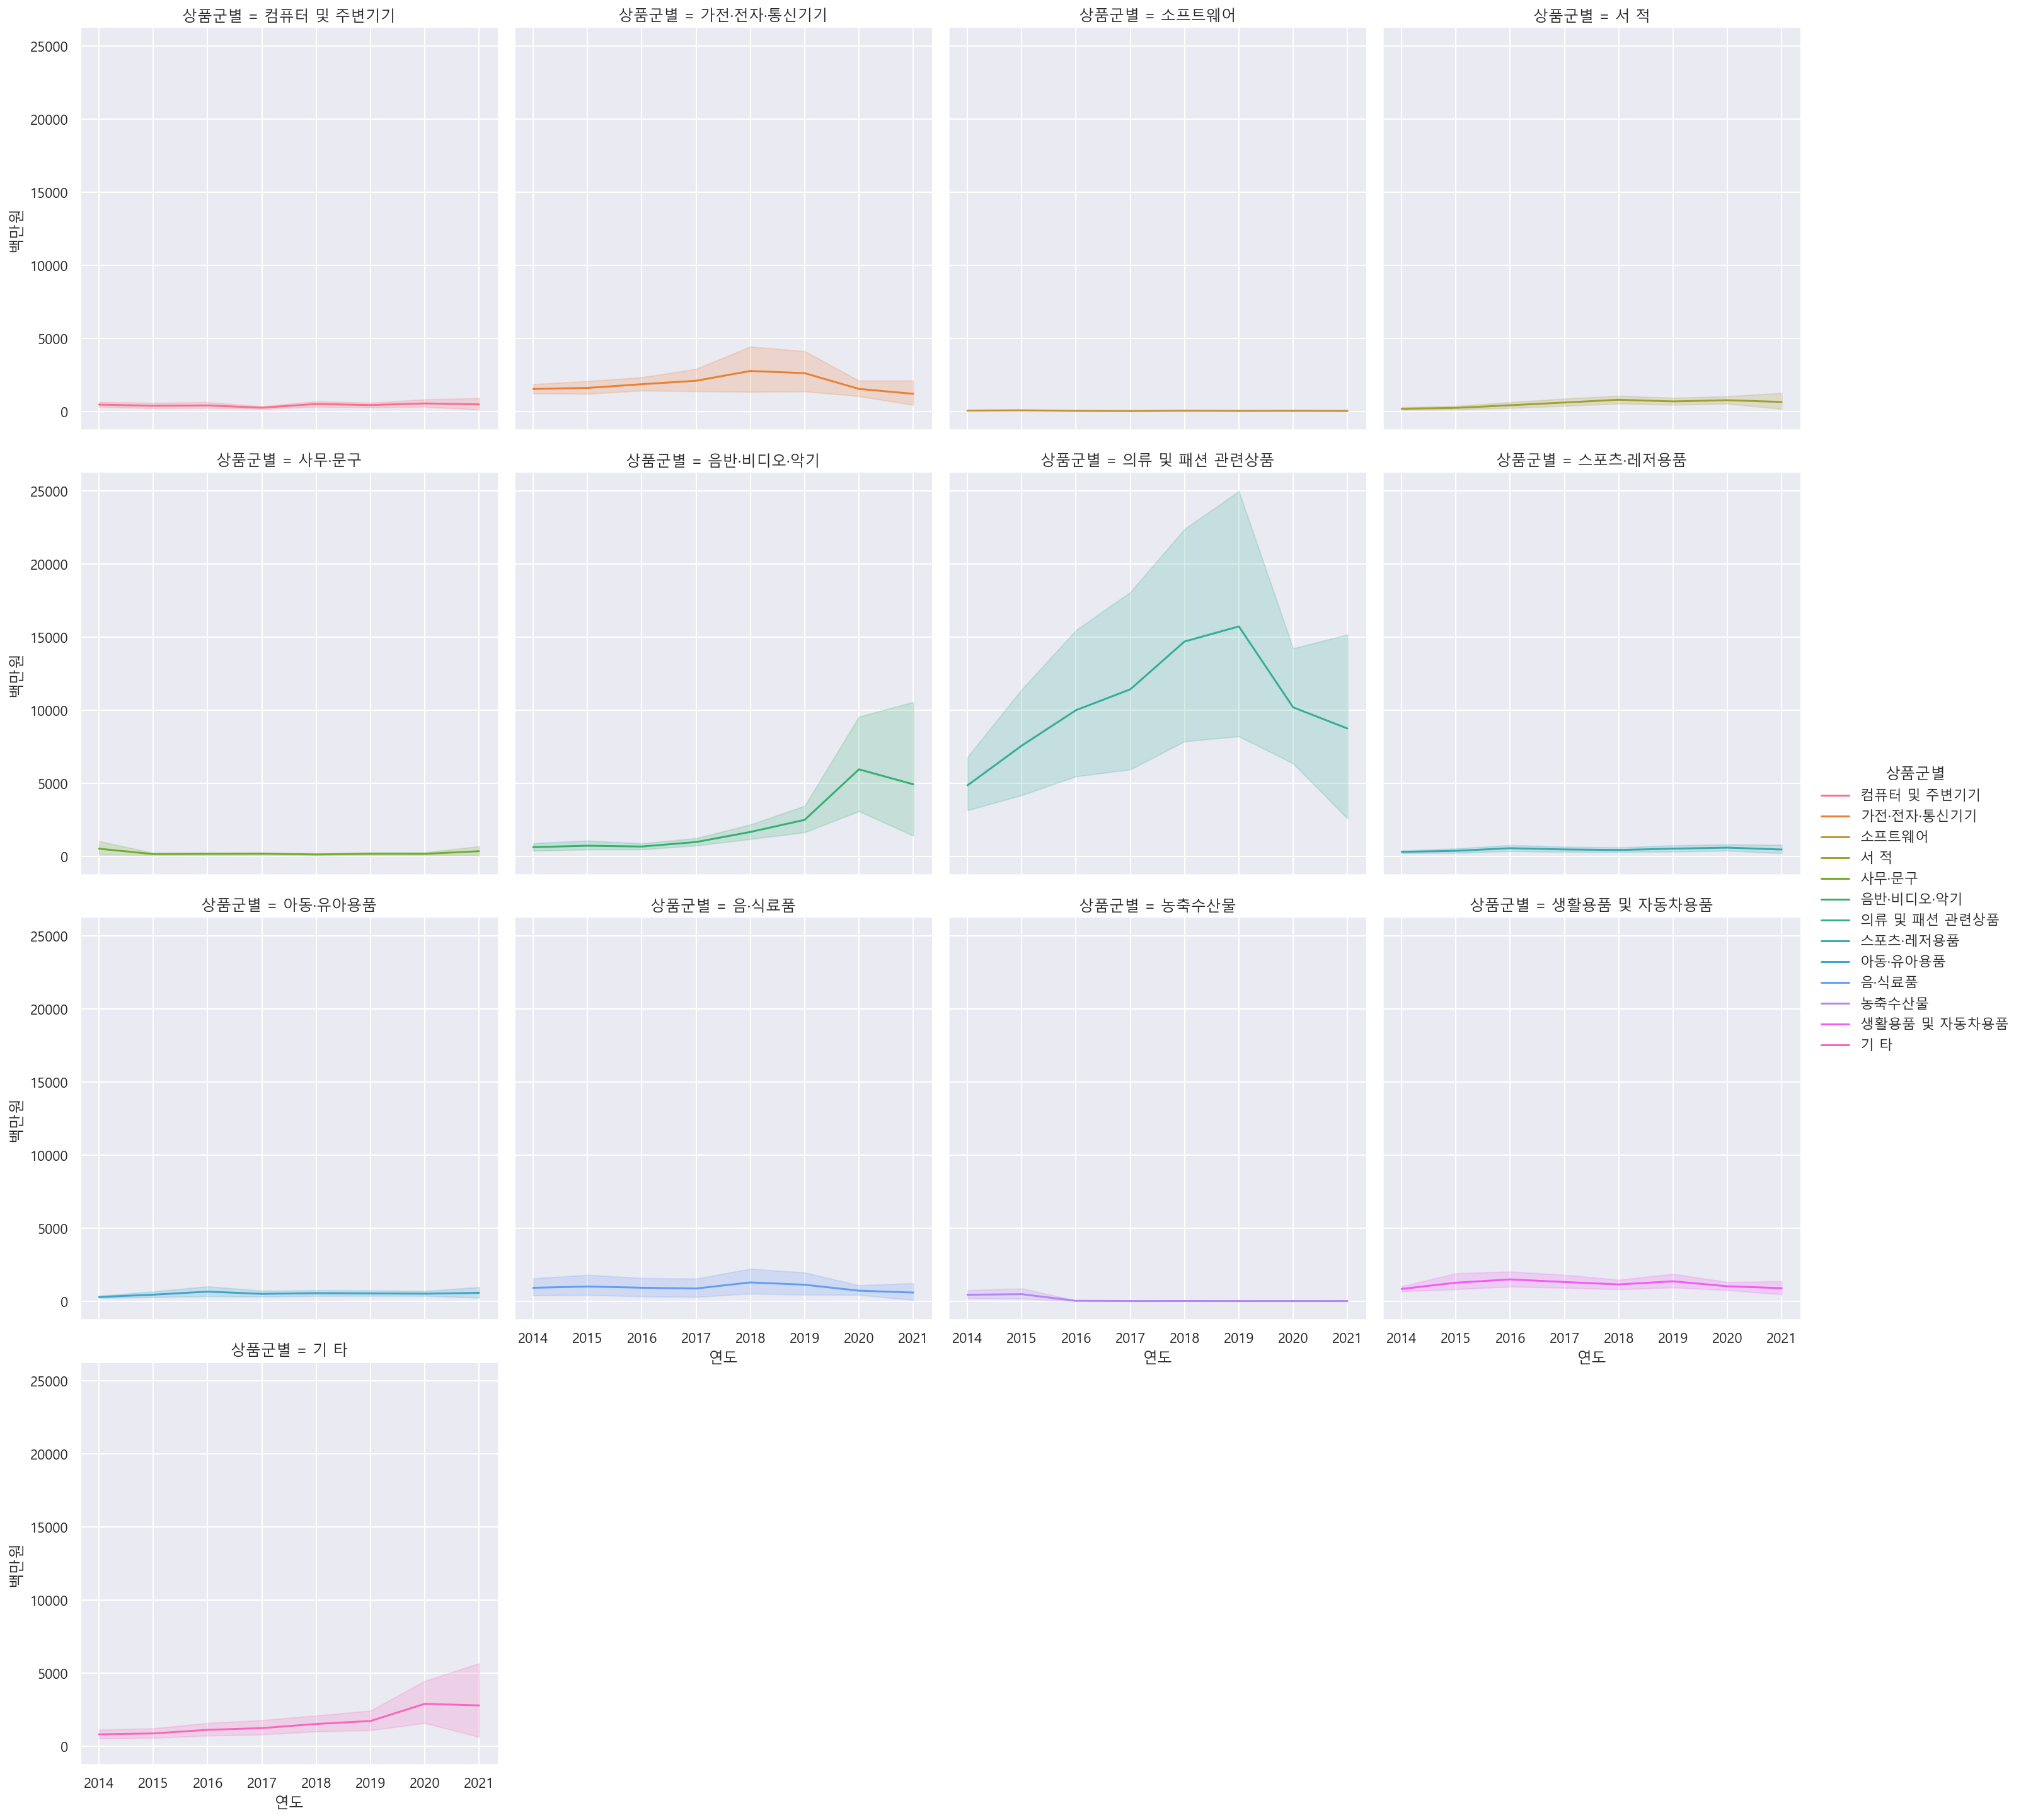

In [35]:
# 화장품, 패션관련 상품의 전반적인 값이 너무 크기 때문에 다른 변수들은 값의 확인이 어려움
# isin을 사용하여 화장품을 제외한 값들만 추출하여 subplot 그리기

df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션관련 상품"])].copy()
sns.relplot(data=df_sub, x="연도", y="백만원", kind="line",
           hue="상품군별", col="상품군별", col_wrap=4)

### 화장품의 온라인쇼핑 해외직접판매액

In [38]:
# 상품군이 화장품인 데이터만 가져오기

df_cosmetic = df_total[df_total["상품군별"]=="화장품"].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='백만원'>

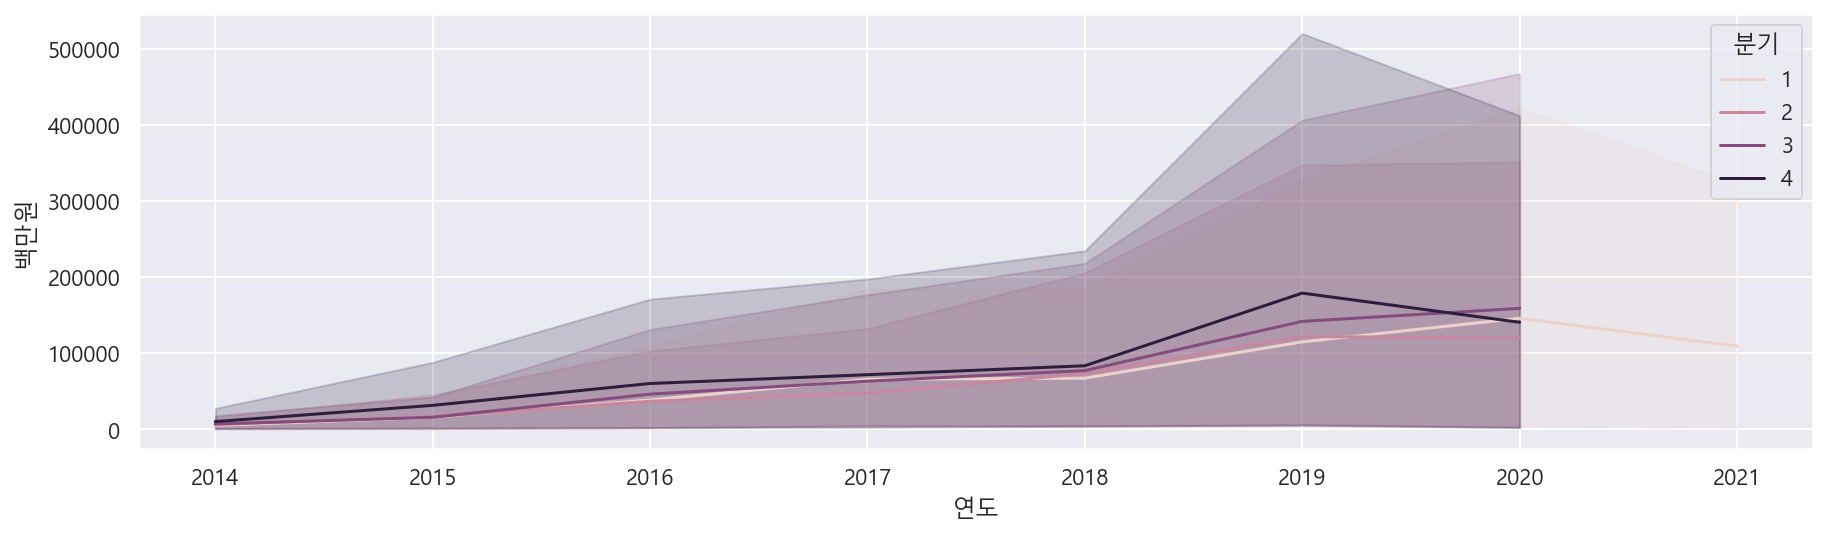

In [41]:
# 연도, 판매액 lineplot으로 그리기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

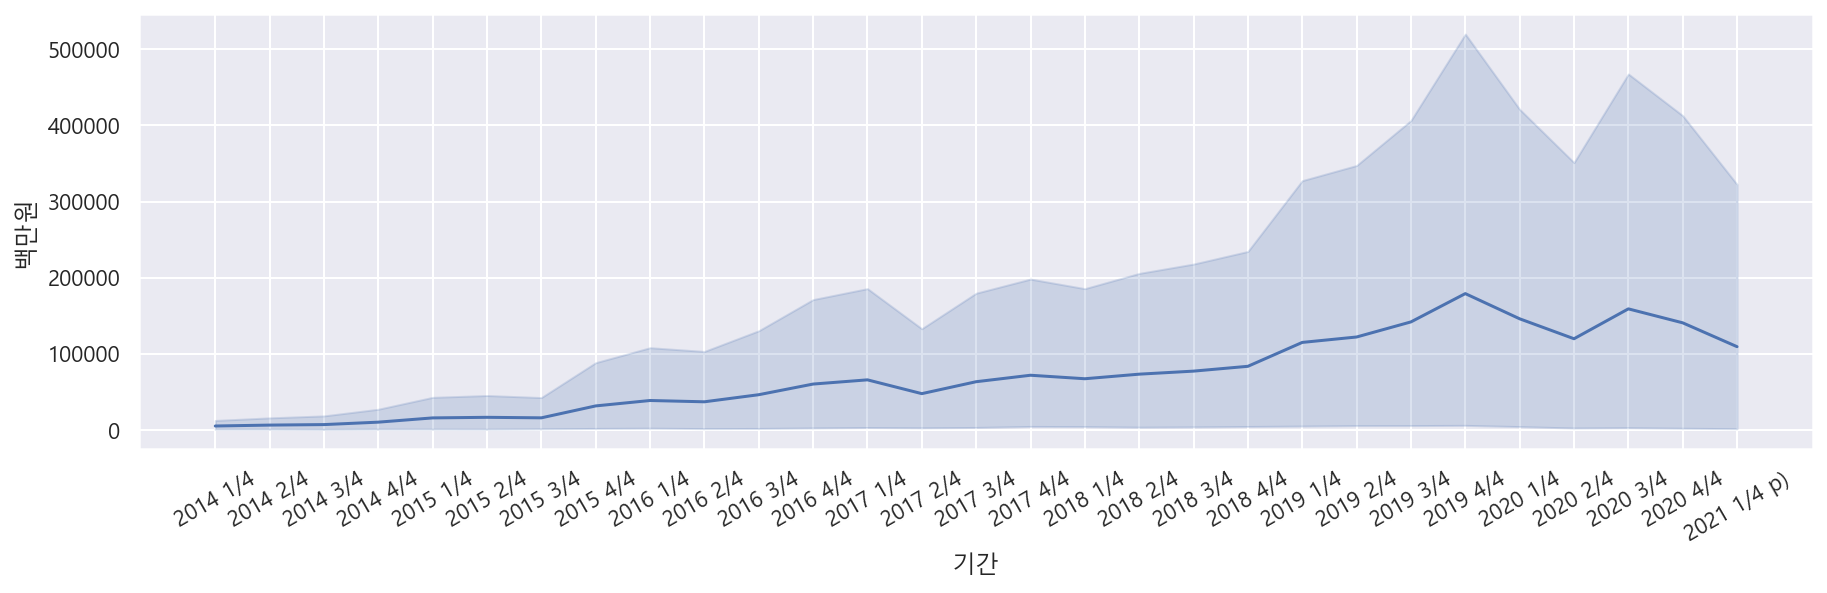

In [43]:
# 화장품 판매 데이터에 대한 기간별 금액 데이터 시각화
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

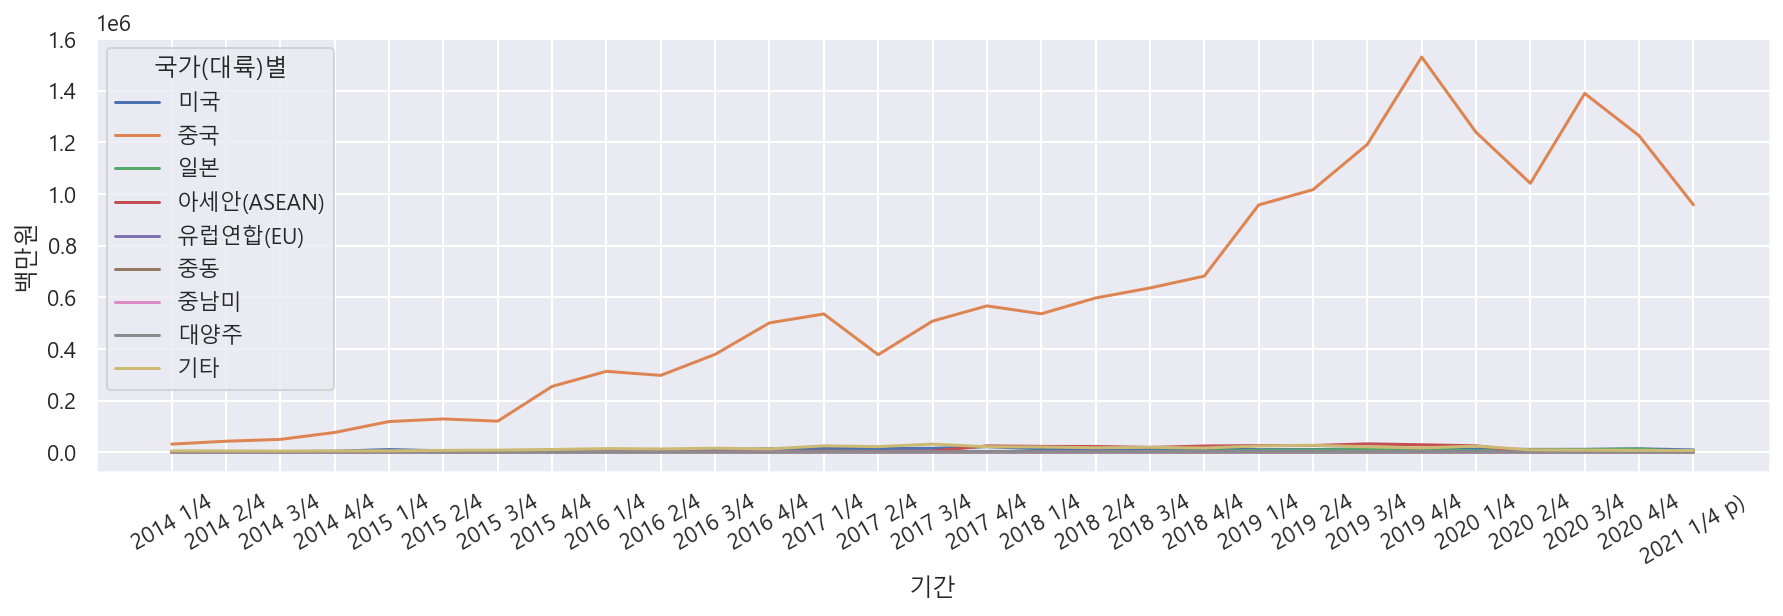

In [44]:
# 국가 별로 다른 색으로 시각화
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

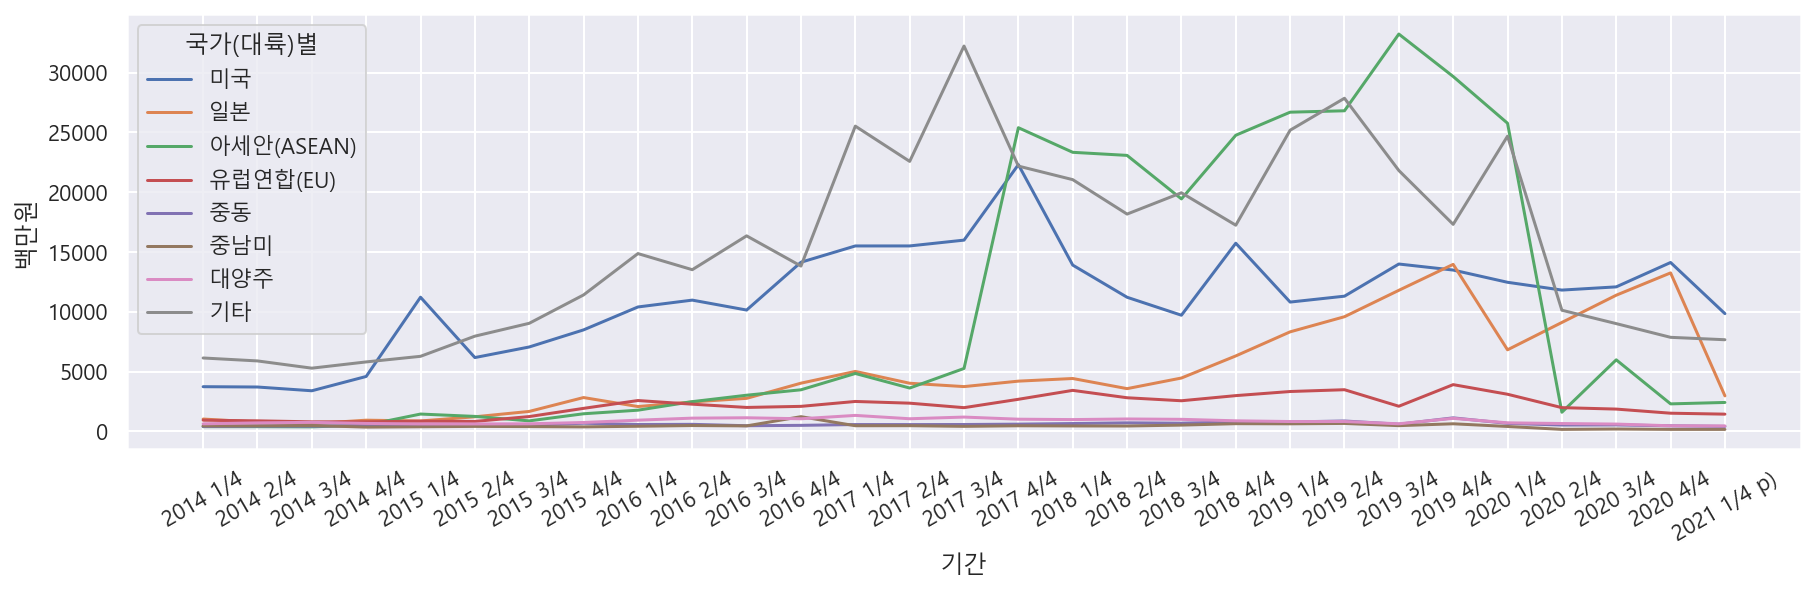

In [45]:
# 중국을 제외한 다른 국가들로 시각화

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], 
             x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

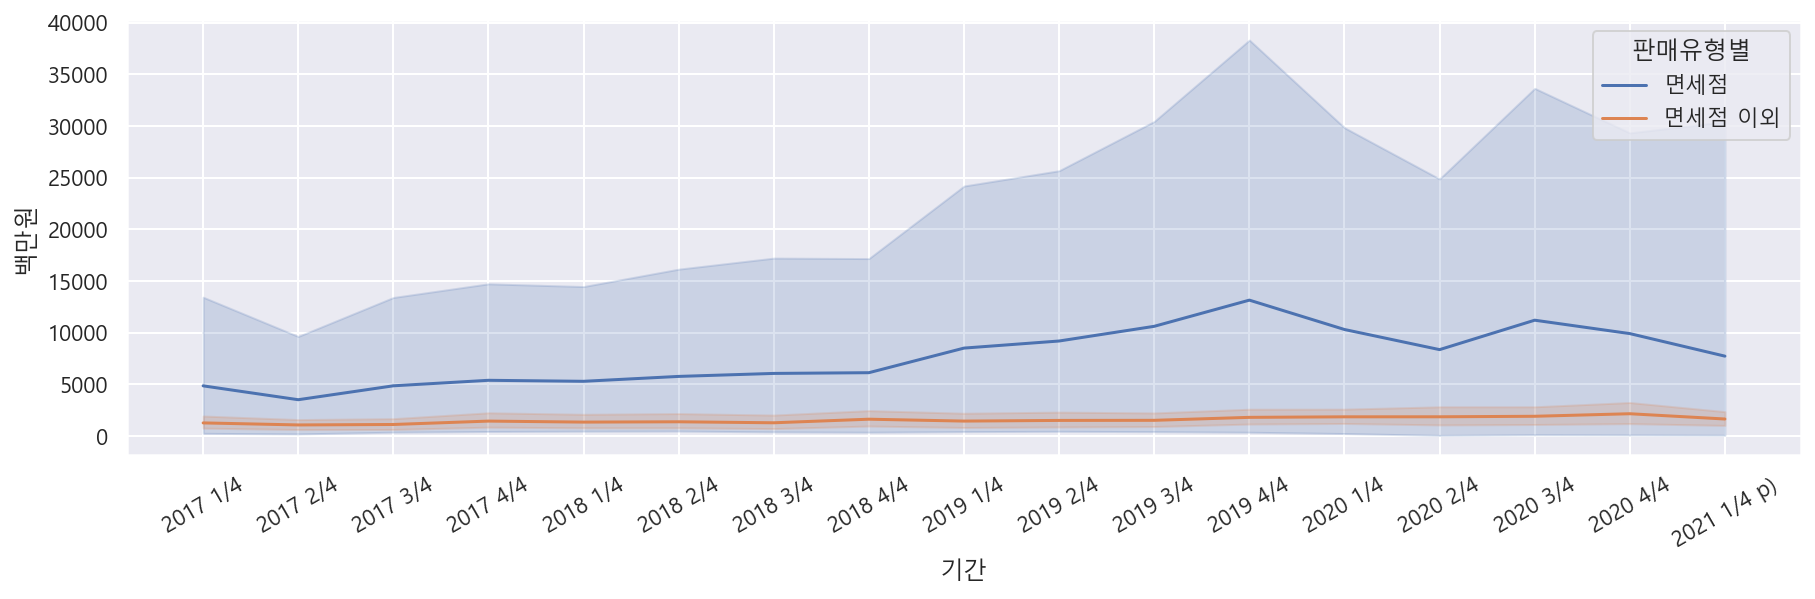

In [47]:
# 판매유형별로 다른 색상으로 시각화
df_sub = df[df["판매유형별"] != "계"].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

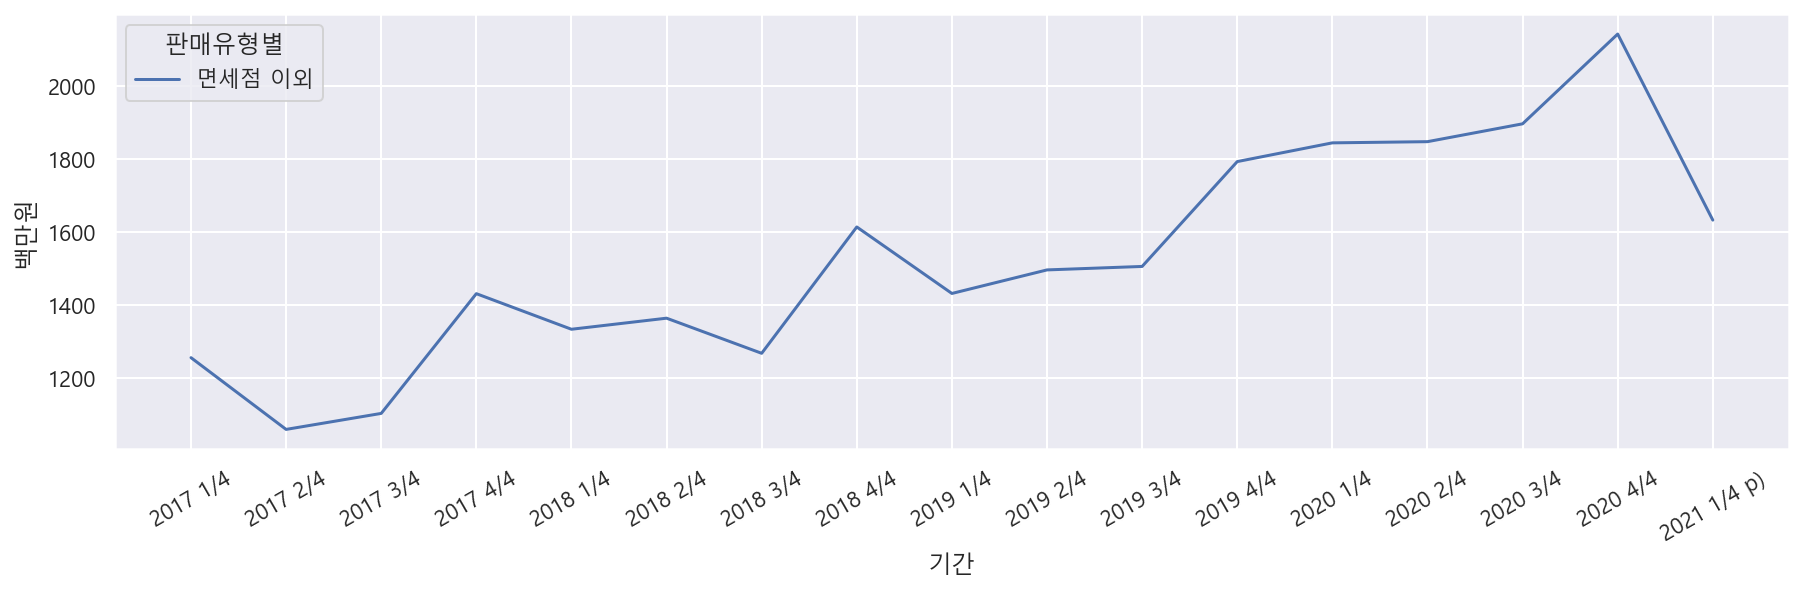

In [49]:
# 면세점 이외의 데이터만 시각화
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", ci=None)

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

In [52]:
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


<AxesSubplot:xlabel='기간', ylabel='백만원'>

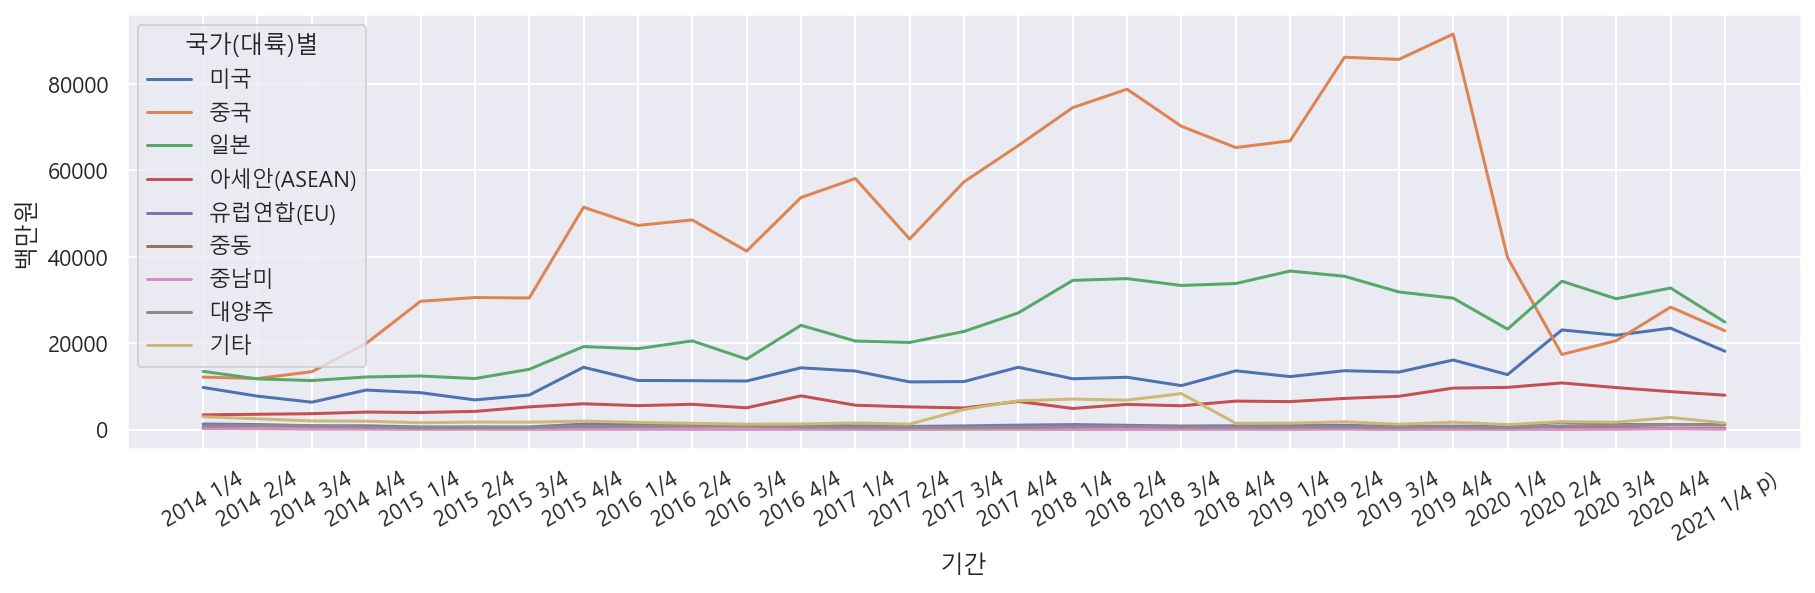

In [55]:
# 의류 및 패션관련 상품 판매액에 대한 기간별 금액 데이터 시각화, 국가(대륙)별로 다른 색깔로 표시
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

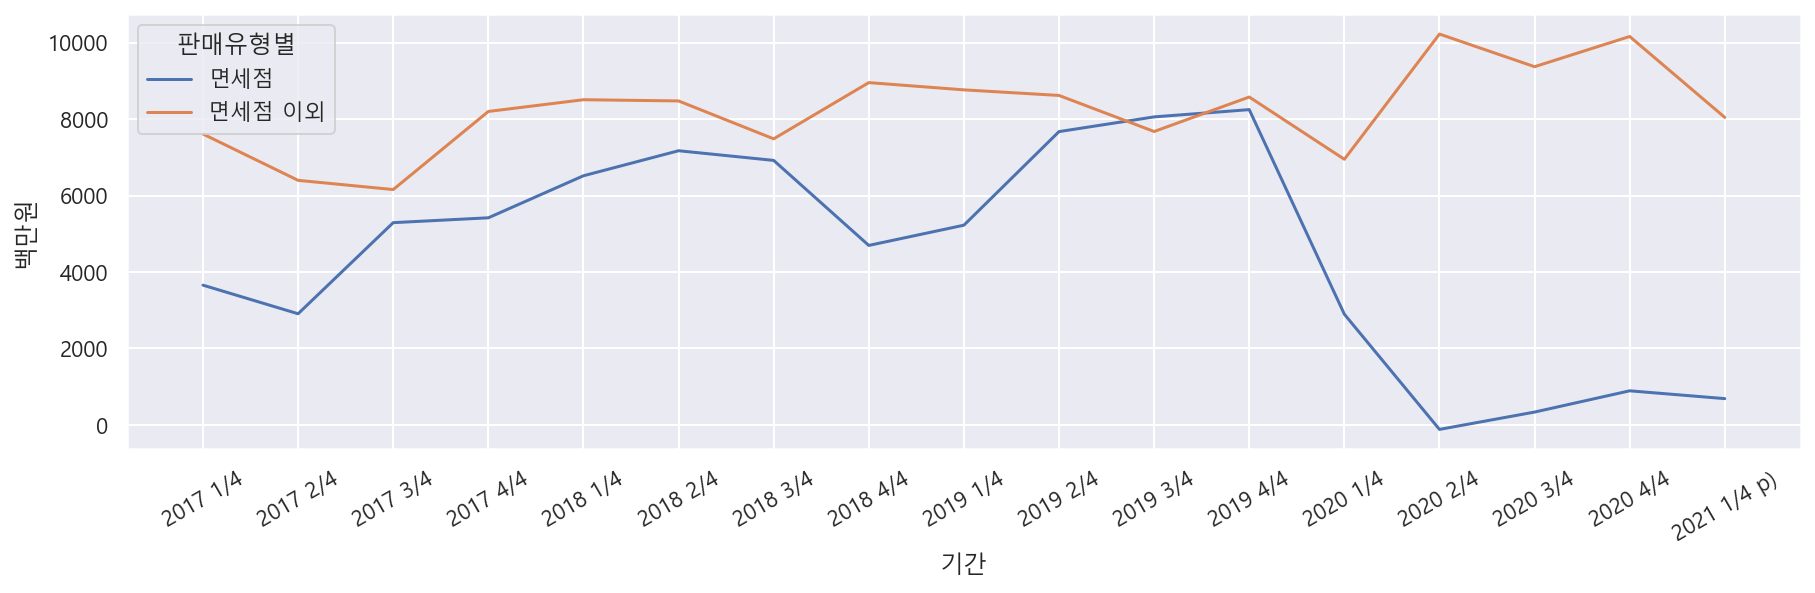

In [58]:
# 의류 및 패션관련 상품 판매액에 대한 기간별 금액 데이터 시각화, "판매유형별"로 다른 색깔로 표시
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

### 데이터 집계하기

In [65]:
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


In [66]:
# pivot table로 "국가(대륙)별", "연도"별 합계 금액을 표 형태로 구하기
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", 
                                values="백만원", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019,2020,2021
국가(대륙)별,,,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0,7734.0,1585.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0,3686.0,1159.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0,81297.0,18181.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0,39313.0,8019.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,5045.0,1282.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0,120817.0,24926.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0,106318.0,22919.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0,611.0,147.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0,1767.0,403.0


### 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

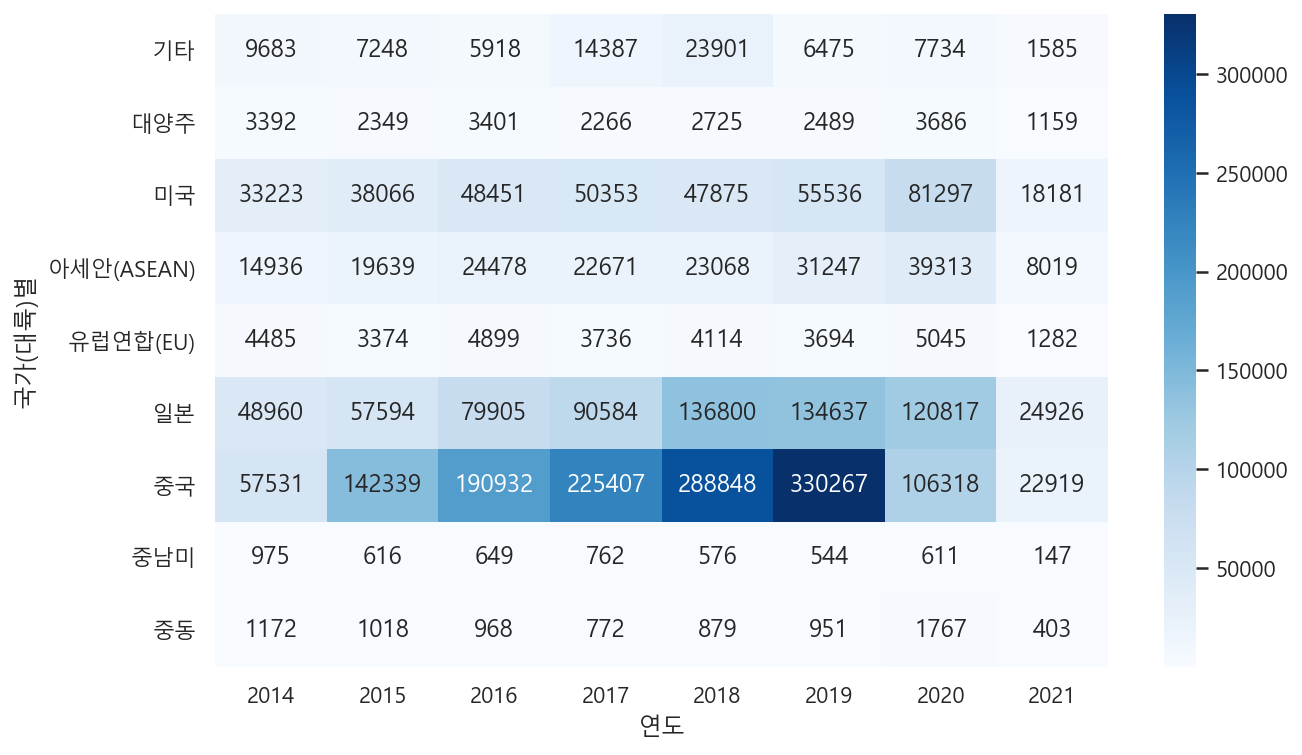

In [71]:
# pivot table로 구한 결과를 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='백만원'>

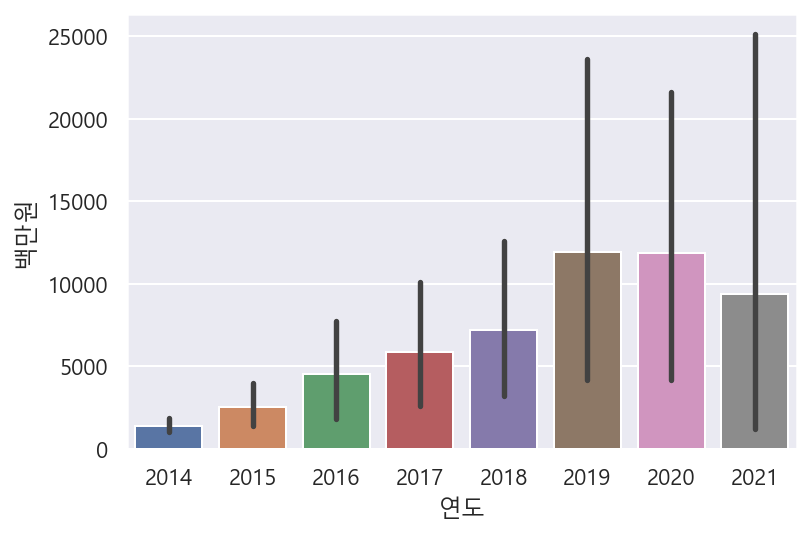

In [72]:
# 연도별 합계금액 시각화
sns.barplot(data=df_total, x="연도", y="백만원")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

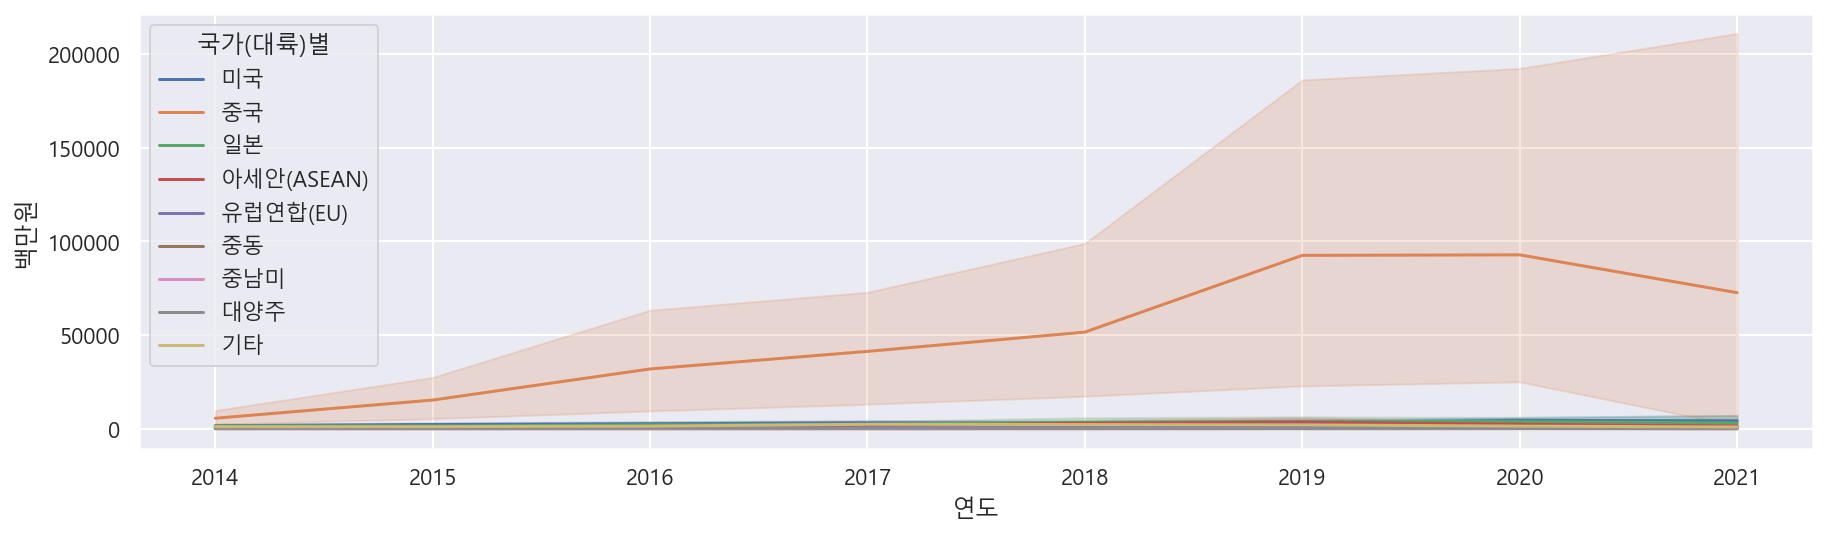

In [74]:
# 국가(대륙)별로 다른 색상으로 표현
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

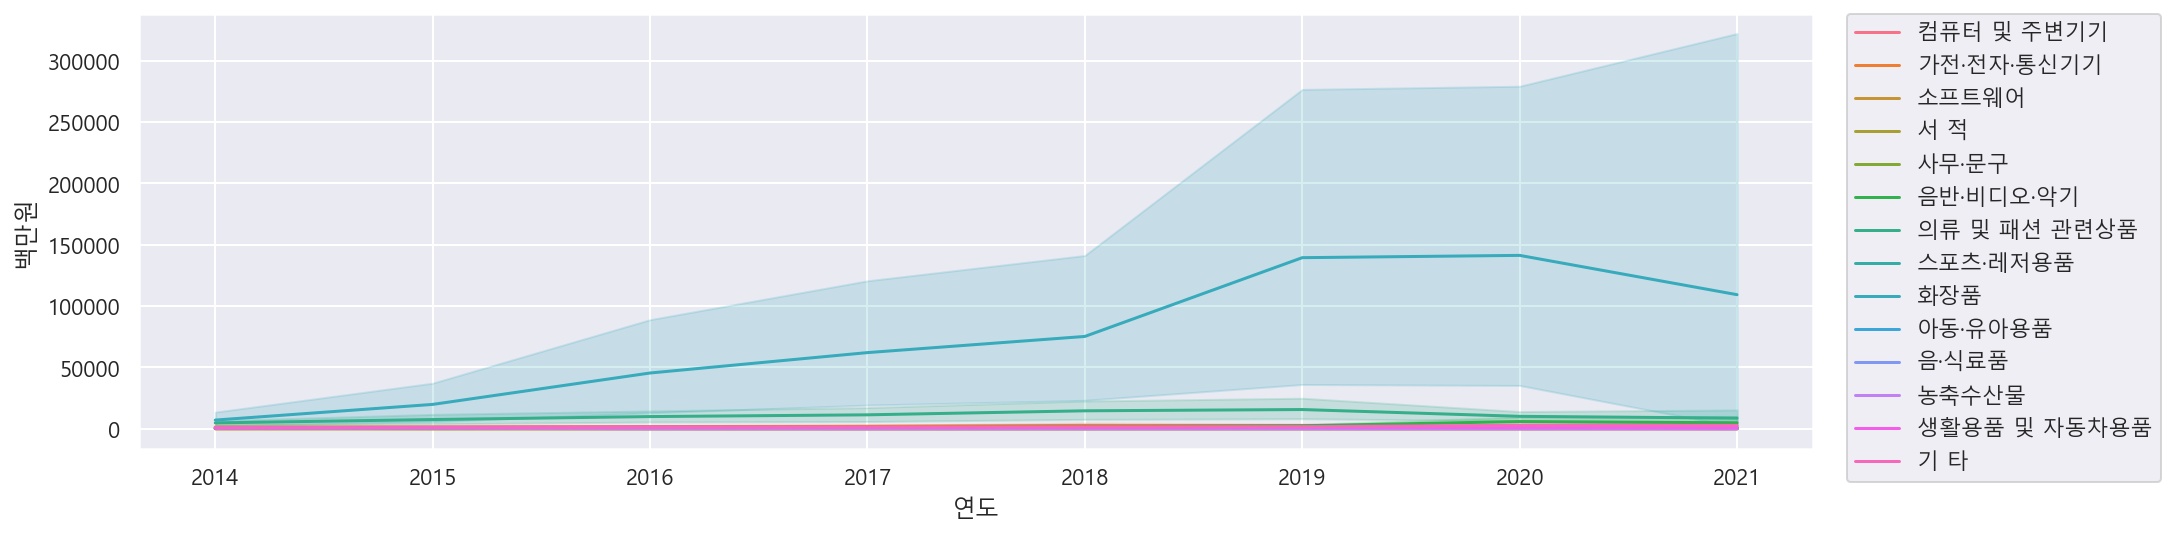

In [77]:
# 상품군 별로 다른 색상으로 표시하기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)